# Importar Librarias y datos

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [17]:
df = pd.read_parquet("output_08.parquet")

In [19]:
df.head()

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
0,0.853333,1.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.002916,...,True,False,True,False,True,False,False,False,False,False
1,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
2,0.080000,0.0,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
4,0.733333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,False,True,False,True,False,False,False,False,False
5,0.400000,0.0,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True


In [21]:
df.columns

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'income_above_limit',
       'education_secondary_complete', 'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat

# Combinado

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek

In [26]:
X = df.drop("income_above_limit", axis=1)
y = df["income_above_limit"]

X_resampled, y_resampled = SMOTETomek().fit_resample(X, y)



model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

importances = model.feature_importances_
feature_names = X.columns

sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print(sorted_features)


[('stocks_status', 0.17420616736259137), ('age', 0.12894566551171768), ('occupation_code', 0.1209431312061487), ('working_week_per_year', 0.08255160790048698), ('total_employed', 0.072662594576645), ('education_university_graduate_or_higher', 0.061844015497309925), ('gender', 0.06077892850044257), ('gains', 0.052131726606657616), ('industry_code_main_Not in universe or children', 0.017950025967834512), ('household_stat_Householder', 0.01751603366342771), ('losses', 0.015040977323213344), ('employment_stat', 0.013707718078797065), ('tax_status_Joint both under 65', 0.013501237866781214), ('education_secondary_complete', 0.01312161587100454), ('industry_code_main_Otro', 0.012478149940990784), ('education_secondary_incomplete', 0.011359564664974077), ('wage_per_hour', 0.010203162479893982), ('marital_status_Married-civilian spouse present', 0.00916375686288489), ('tax_status_Nonfiler', 0.008467713300753164), ('education_technical_education/university_incomplete', 0.007670995055004861), ('

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Apply scaling


# Elegir las columnas

In [32]:
rfe = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'household_stat_Householder'],
      dtype='object')


household stat es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [93]:
selected = ['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses', 
            'stocks_status', 'household_stat_Householder', 'household_stat_Other', 'country_of_birth_own_US']

# Separar por el modelo

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Probar con varios numeros de Clusters

In [43]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.8748986806932827, 0.8919030783823403, 0.8805380701905665, 0.8857290678623781, 0.8767612313529362, 0.8795378115029749, 0.8718806587910667, 0.8731568509097181, 0.8675864447701992, 0.8699836164525309, 0.865292748124515, 0.8661895317754592, 0.8618090885573856]


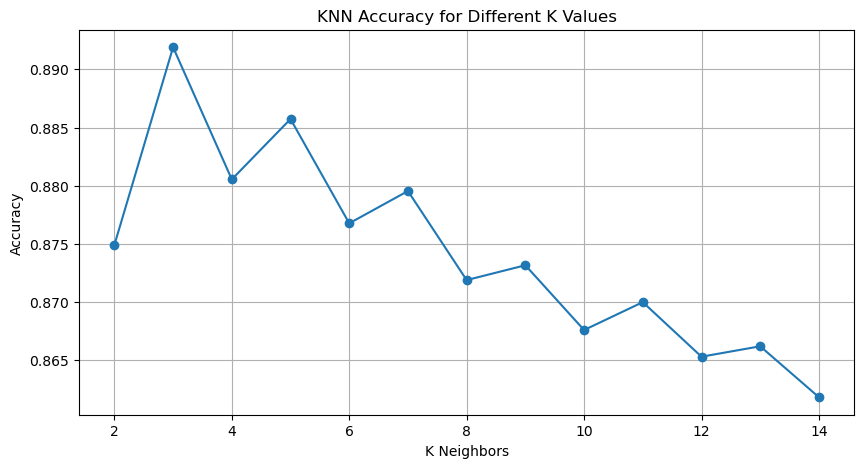

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elegir numero optimo de Clusters

### Mirando ese grafico **3** es que sale con lo mejor presicion

In [50]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 3  Accuracy: 0.8919


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     28923
         1.0       0.91      0.87      0.89     29062

    accuracy                           0.89     57985
   macro avg       0.89      0.89      0.89     57985
weighted avg       0.89      0.89      0.89     57985



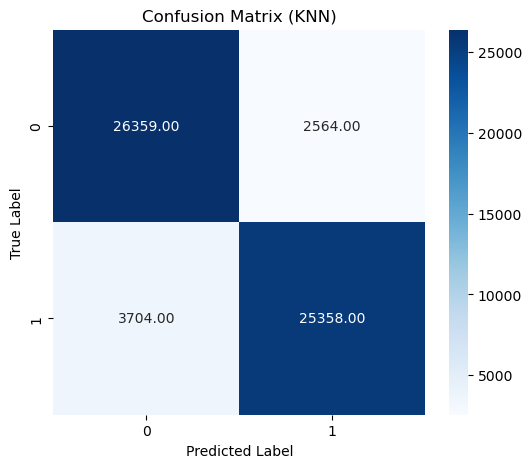

In [51]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.8919030783823403
Sensibilidad: 0.872548344917762
Especificidad: 0.9113508280607129
Negative Predictive Value (NPV): 0.8767920699863619


# Elegir columanas con solver=Saga

In [54]:
rfe = RFE(estimator=LogisticRegression(solver='saga', max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'employment_commitment_Full-time schedules'],
      dtype='object')


household stat es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [61]:
selected = ['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'employment_commitment_Full-time schedules', 'employment_commitment_Not in labor force',
       'employment_commitment_Otro','country_of_birth_own_US']
       

# Separar por el modelo

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Probar con varios numeros de Clusters

In [69]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.8719323963093903, 0.8891782357506252, 0.8758644477019919, 0.8809002328188325, 0.8725187548503923, 0.8753298266793136, 0.8670345779080797, 0.8693282745537639, 0.8621712511856514, 0.864189014400276, 0.8591532292834354, 0.8604121755626455, 0.8550659653358628]


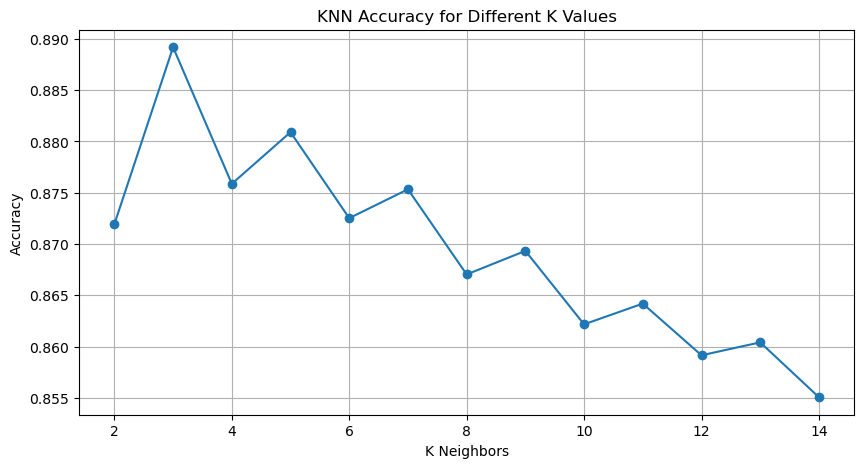

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elegir numero optimo de Clusters

### Mirando ese grafico **3** es que sale con lo mejor presicion

In [74]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 3  Accuracy: 0.8892


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     28923
         1.0       0.91      0.87      0.89     29062

    accuracy                           0.89     57985
   macro avg       0.89      0.89      0.89     57985
weighted avg       0.89      0.89      0.89     57985



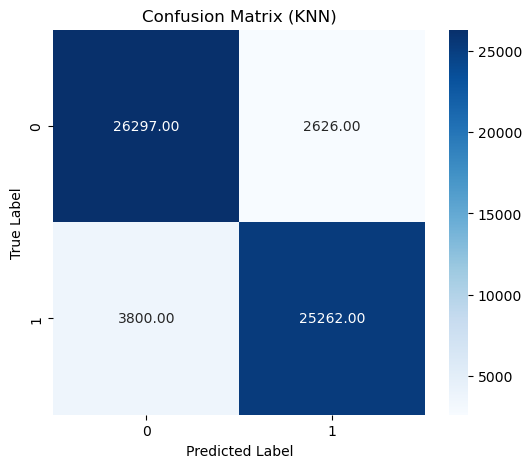

In [75]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [76]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.8891782357506252
Sensibilidad: 0.8692450622806414
Especificidad: 0.9092072053383121
Negative Predictive Value (NPV): 0.8737415689271356
